In [3]:
import numpy as np 
from astropy.io import fits 
# -- iquench -- 
from letstalkaboutquench import util as UT
# -- pydl -- 
from pydl.pydlutils.spheregroup import spherematch

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [5]:
# data with the galaxy information
fgals = fits.open(''.join([UT.dat_dir(), 'gal_info_dr7_v5_2.fit.gz']))
data_gals = fgals[1].data

# data with the SFR information 
fsfrs = fits.open(''.join([UT.dat_dir(), 'gal_totsfr_dr7_v5_2.fits.gz']))
data_sfrs = fsfrs[1].data

if len(data_gals['ra']) != len(data_sfrs['median']):
    raise ValueError("the data should have the same number of galaxies")

In [17]:
#ngal = len(data_gals.ra)
ngal = 100000

In [18]:
matches = spherematch(data_gals['ra'][:ngal], data_gals['dec'][:ngal], 
                      data_gals['ra'][:ngal], data_gals['dec'][:ngal], 
                      0.000833333, maxmatch=0)

In [19]:
m0, m1, d_m = matches

In [20]:
n_matches = np.zeros(ngal)
sfr_list = [[] for i in range(ngal)]

for i in range(ngal): 
    ism = (i == m0)
    n_matches[i] = np.sum(ism)
    if n_matches[i] > 1:         
        #print '#', data_gals.ra[i], data_gals.dec[i], data_sfrs.median[i]
        sfr_list[i] = data_sfrs['median'][m1[np.where(ism)]]
        #for r,d,s in zip(data_gals.ra[m1[np.where(ism)]], data_gals.dec[m1[np.where(ism)]], data_sfrs.median[m1[np.where(ism)]]): 
        #    print r, d, s
    #sfr_list[i] = data_sfrs.median[:10000][ism]

In [21]:
for i in np.where(n_matches > 1)[0][:5]: 
    print sfr_list[i] 
    print np.mean(sfr_list[i]), np.std(sfr_list[i])

[-0.46492234 -0.5197079 ]
-0.4923151 0.02739279
[0.25182927 0.17580664]
0.21381795 0.038011312
[-0.71020395 -0.6401274 ]
-0.67516565 0.035038263
[-99. -99.]
-99.0 0.0
[-0.32268193 -0.12419786]
-0.2234399 0.09924204


In [23]:
mu_sfrs, sig_sfrs = [], [] 
for i in np.where(n_matches > 1)[0]: 
    if -99. in sfr_list[i]:
        continue
    mu_sfrs.append(np.mean(sfr_list[i]))
    sig_sfrs.append(np.std(sfr_list[i], ddof=1))

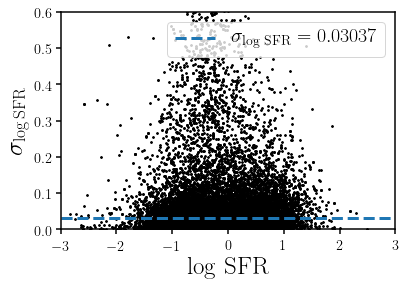

In [35]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(mu_sfrs, sig_sfrs, c='k', s=2)
sub.plot([-3., 3.], [np.median(sig_sfrs), np.median(sig_sfrs)], c='C0', ls='--', lw=3, 
         label='$\sigma_{\log\,\mathrm{SFR}}='+str(round(np.median(sig_sfrs),5))+'$')
sub.legend(loc='upper right', frameon=True, fontsize=20)
sub.set_xlim([-3., 3.])
sub.set_xlabel('log SFR', fontsize=25)
sub.set_ylim([0., 0.6])
sub.set_ylabel('$\sigma_\mathrm{log\,SFR}$', fontsize=25)
plt.show()

Text(0.5,0,'$\\sigma_\\mathrm{log\\,SFR}$')

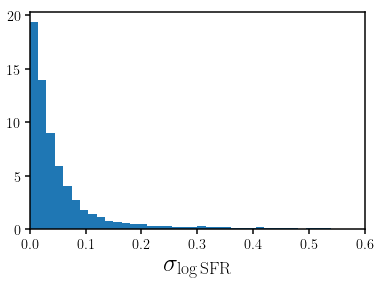

In [27]:
plt.hist(np.array(sig_sfrs), bins=40, range=[0.0, 0.6], normed=True, histtype='stepfilled')
plt.xlim([0., 0.6])
plt.xlabel('$\sigma_\mathrm{log\,SFR}$', fontsize=25)